In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import seaborn as sns
import time

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, scorer, precision_score, recall_score

In [0]:
%matplotlib inline

In [0]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [0]:
dataset = pd.read_csv("/content/drive/My Drive/Google Collab/telco-churn.csv", delimiter = ',')

In [0]:
dataset['TotalCharges'] = dataset["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
dataset = dataset[dataset["TotalCharges"].notnull()]
dataset = dataset.reset_index()[dataset.columns]

#convert to float type
dataset["TotalCharges"] = dataset["TotalCharges"].astype(float)

In [0]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols : 
    dataset[i]  = dataset[i].replace({'No internet service' : 'No'})
    
dataset["SeniorCitizen"] = dataset["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [0]:
churn = dataset[dataset["Churn"] == "Yes"]
not_churn = dataset[dataset["Churn"] == "No"]

In [0]:
Id_col = ['customerID']
target_col = ["Churn"]

#categorical columns
categorical_cols   = dataset.nunique()[dataset.nunique() < 6].keys().tolist()
categorical_cols   = [x for x in categorical_cols if x not in target_col]

#numerical columns
numerical_cols   = [x for x in dataset.columns if x not in categorical_cols + target_col + Id_col]

#Binary columns with 2 values
binary_cols   = dataset.nunique()[dataset.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in categorical_cols if i not in binary_cols]

In [0]:
le = LabelEncoder()

for i in binary_cols :
    dataset[i] = le.fit_transform(dataset[i])

In [0]:
dataset = pd.get_dummies(data = dataset,columns = multi_cols)

std = MinMaxScaler()

scaled = std.fit_transform(dataset[numerical_cols])
scaled = pd.DataFrame(scaled,columns=numerical_cols)

In [0]:
df_telcom = dataset.copy()

dataset = dataset.drop(numerical_cols,axis = 1)
dataset = dataset.merge(scaled,left_index=True,right_index=True,how = "left")

In [0]:
import random

In [0]:
dataset = dataset.sample(395)

In [0]:
y_labels = dataset.pop('Churn')

dataset = dataset.drop(['customerID'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(dataset, y_labels, test_size = 0.33, random_state = 777)

In [0]:
#Model Creation
model = Sequential()
model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(14, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

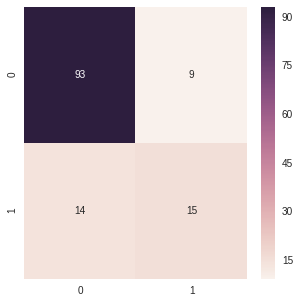

In [21]:
predictions = model.predict(x_test)

threshold = 0.5
predictions = (predictions > threshold)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

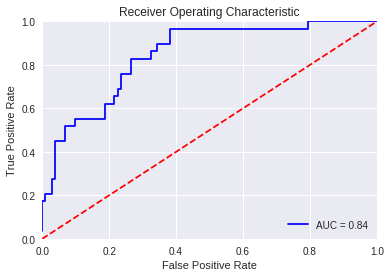

In [22]:
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
score = round(accuracy_score(y_test, predictions),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.82 
131/131 [==============================] - 0s 409us/step

acc: 82.44%


In [0]:
#Model Creation
model2 = Sequential()
model2.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='sigmoid'))
model2.add(Dense(14, kernel_initializer='normal', activation='sigmoid'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Model Compilation
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model2.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

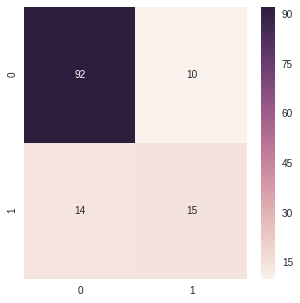

In [26]:
predictions2 = model2.predict(x_test)

threshold = 0.5
predictions2 = (predictions2 > threshold)

cm2 = confusion_matrix(y_test, predictions2)
plt.figure(figsize = (5,5))

sns.heatmap(cm2, annot=True, fmt="d")

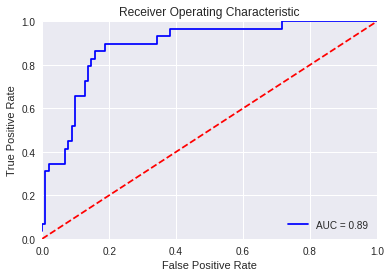

In [27]:
y_pred_keras = model2.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [28]:
score = round(accuracy_score(y_test, predictions2),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model2.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.82 
131/131 [==============================] - 0s 477us/step

acc: 81.68%


In [0]:
#Model Creation
model3 = Sequential()
model3.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='tanh'))
model3.add(Dense(14, kernel_initializer='normal', activation='tanh'))
model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

#Model Compilation
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
model3.fit(x_train, y_train, epochs=150, batch_size=5, verbose=0)

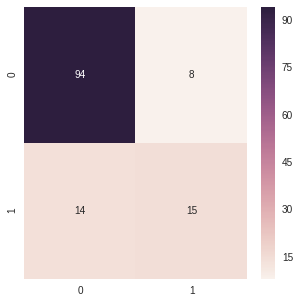

In [31]:
predictions3 = model3.predict(x_test)

threshold = 0.5
predictions3 = (predictions3 > threshold)

cm3 = confusion_matrix(y_test, predictions3)
plt.figure(figsize = (5,5))

sns.heatmap(cm3, annot=True, fmt="d")

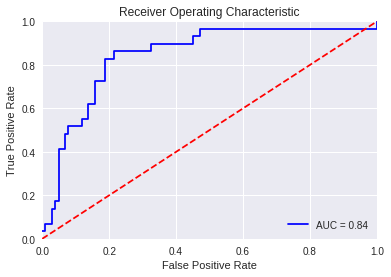

In [32]:
y_pred_keras = model3.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % auc_keras)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
score = round(accuracy_score(y_test, predictions3),2)
print('Accuracy of Base Model: {} '.format(score))

scores = model3.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))

Accuracy of Base Model: 0.83 
131/131 [==============================] - 0s 580us/step

acc: 83.21%


In [0]:
scores = []
times = []
nodes = np.arange(1,29)
    
for x in nodes:
  
    #Model Creation
    model = Sequential()
    model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='relu'))
    model.add(Dense(x, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    
    #Model Compilation
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  
    
    model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times.append(x)
    score = model.evaluate(x_test, y_test, verbose=0)[1]
    scores.append(score)

In [0]:
scores2 = []
times2 = []
nodes = np.arange(1,29)
    
for x in nodes:
  
    #Model Creation
    model2 = Sequential()
    model2.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='sigmoid'))
    model2.add(Dense(x, kernel_initializer='normal', activation='sigmoid'))
    model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    #Model Compilation
    model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model2.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times2.append(x)
    score = model2.evaluate(x_test, y_test, verbose=0)[1]
    scores2.append(score)

In [0]:
scores3 = []
times3 = []
nodes = np.arange(1,29)
    
for x in nodes:
  
    #Model Creation
    model3 = Sequential()
    model3.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='tanh'))
    model3.add(Dense(x, kernel_initializer='normal', activation='tanh'))
    model3.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    #Model Compilation
    model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model3.fit(x_train, y_train, epochs=150, batch_size=10, verbose=0)
    times3.append(x)
    score = model3.evaluate(x_test, y_test, verbose=0)[1]
    scores3.append(score)

In [0]:
final_results = pd.DataFrame()
final_results['Nodes'] = times
final_results['model1_score'] = scores
final_results['model2_score'] = scores2
final_results['model3_score'] = scores3

In [42]:
print('The # of nodes that gave the best accuracy for ReLu Model is {}'.format(int(final_results.loc[final_results['model1_score'].idxmax()][0])))
print('The # of nodes that gave the best accuracy for Sigmoid Model is {}'.format(int(final_results.loc[final_results['model2_score'].idxmax()][0])))
print('The # of nodes that gave the best accuracy for Tanh Model is {}'.format(int(final_results.loc[final_results['model3_score'].idxmax()][0])))

The # of nodes that gave the best accuracy for ReLu Model is 3
The # of nodes that gave the best accuracy for Sigmoid Model is 2
The # of nodes that gave the best accuracy for Tanh Model is 1


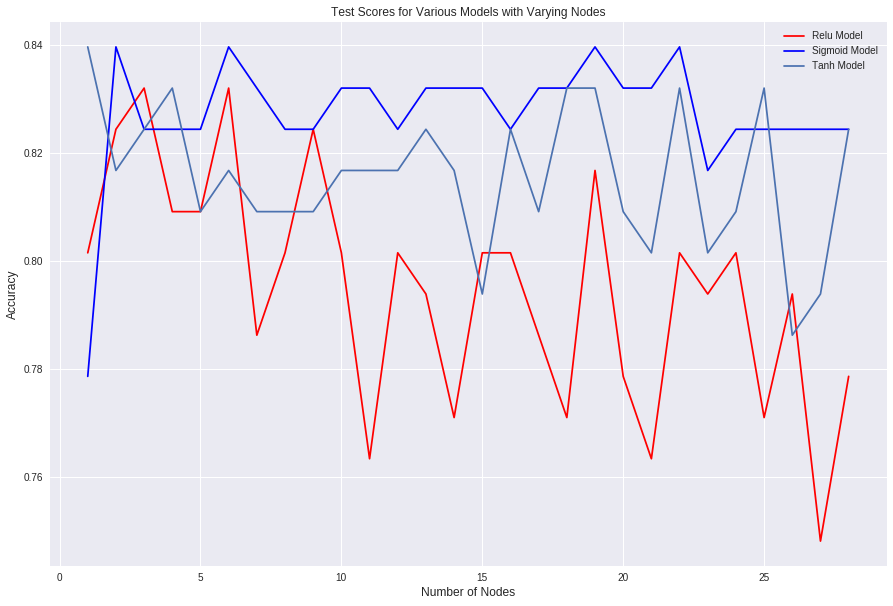

In [43]:
plt.figure(figsize=(15,10))

plt.plot(times, scores, 'r-', label='Relu Model')
plt.plot(times, scores2, 'b-', label='Sigmoid Model')
plt.plot(times, scores3, '-', label='Tanh Model')

plt.legend(loc='best')
plt.title('Test Scores for Various Models with Varying Nodes')
plt.xlabel('Number of Nodes', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.show()

In [0]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='relu'))
  model.add(Dense(22, kernel_initializer='normal', activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

In [0]:
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [48]:
n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.761 (std: 0.045)
Parameters: {'epochs': 60, 'batch_size': 90}

Model with rank: 2
Mean validation score: 0.761 (std: 0.040)
Parameters: {'epochs': 40, 'batch_size': 50}

Model with rank: 3
Mean validation score: 0.761 (std: 0.049)
Parameters: {'epochs': 80, 'batch_size': 50}



In [49]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(22, kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.735 (std: 0.043)
Parameters: {'epochs': 60, 'batch_size': 10}

Model with rank: 2
Mean validation score: 0.727 (std: 0.060)
Parameters: {'epochs': 70, 'batch_size': 10}

Model with rank: 3
Mean validation score: 0.723 (std: 0.049)
Parameters: {'epochs': 40, 'batch_size': 40}

Model with rank: 3
Mean validation score: 0.723 (std: 0.049)
Parameters: {'epochs': 50, 'batch_size': 20}

Model with rank: 3
Mean validation score: 0.723 (std: 0.049)
Parameters: {'epochs': 60, 'batch_size': 20}



In [50]:
# Function to create model, required for KerasClassifier
def create_model():
	#Model Creation
  model = Sequential()
  model.add(Dense(28, input_dim=28, kernel_initializer='normal', activation='tanh'))
  model.add(Dense(22, kernel_initializer='normal', activation='tanh'))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
	# Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])	
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
epochs = [10, 20, 30, 40, 50, 60,70, 80, 90, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

n_iter_search = 20
random_search = RandomizedSearchCV(model, param_distributions=param_grid,
                                   n_iter=n_iter_search, cv=5)

random_search.fit(x_train, y_train)
report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.761 (std: 0.049)
Parameters: {'epochs': 50, 'batch_size': 100}

Model with rank: 2
Mean validation score: 0.750 (std: 0.044)
Parameters: {'epochs': 100, 'batch_size': 90}

Model with rank: 3
Mean validation score: 0.750 (std: 0.039)
Parameters: {'epochs': 60, 'batch_size': 50}

Model with rank: 3
Mean validation score: 0.750 (std: 0.041)
Parameters: {'epochs': 70, 'batch_size': 80}

